### Task Video :

#### Dataset Link:
Dataset can be found at " /data/videos/ " in the respective challenge's repo.

#### Description:
Video series is just a sequence of images arranged in a specific order. Images of that sequence are called frames. Therefore, in video intelligence tasks, we take advantage of the temporal nature of video and semantic content in consecutive frames.

#### Objective:
How to read video data and convert it into useable format for machine learning

#### Tasks:
- Load dataset from provided link. Videos are in “.mp4” format.
- Extract frames from video at fps=10 (opencv’s VideoCapture Class)
- Plot 4th frame of 'VID_2.mp4' (matplotlib or Pillow library)
- Print dimensions of any single frame of 'VID_6.mp4'
- Print all pixel values of 10th frame of 'VID_14.mp4'
- Perform sanity check for each video whether all frames have same dimensions or not

#### Further fun (will not be evaluated):
_Prerequisites: CNN and image processing_

- We will perform video classification for fun on this sample dataset. You can download labels here: _(Link to be added soon or self-annotation for small dataset is also possible)_
- Train image classifier on all frames extracted at fps=10 from all videos.
- The naive approach to do video classification would be to classify each frame and save results in sequential format, and that is it !! Obviously there are much better ways of doing video classification taking advantage of the temporal nature of data.

#### Helpful Links:
- Detailed description of how to process video frames: https://www.youtube.com/watch?v=tQetgoLy70s
- Nice tutorial on video classification: https://www.analyticsvidhya.com/blog/2018/09/deep-learning-video-classification-python/
- Used .avi format but the idea is same: https://www.analyticsvidhya.com/blog/2019/09/step-by-step-deep-learning-tutorial-video-classification-python/
- Line-by-Line explanation of video classification code: https://www.pyimagesearch.com/2019/07/15/video-classification-with-keras-and-deep-learning/

In [1]:
import cv2 # For handling videos
import matplotlib.pyplot as plt # For plotting images, you can use pillow library as well
import numpy as np # For mathematical operations 

In [2]:
cap = cv2.VideoCapture('./VID_2.mp4')

In [3]:
framerate = cap.get(5)
print(framerate)

29.98102466793169


In [18]:
total_frames = cap.get(7)


In [9]:

desired_fps = 10
frame_skip = int(np.ceil(framerate/desired_fps))

In [11]:
frames = []
while(cap.isOpened()):
  fId = cap.get(1)
  ret,frame = cap.read()
  if(ret!= True):
    break
  if(fId % frame_skip == 0):
    frames.append(frame)
cap.release()

In [13]:
sv = np.array(frames)
sv.shape

(52, 1080, 1920, 3)

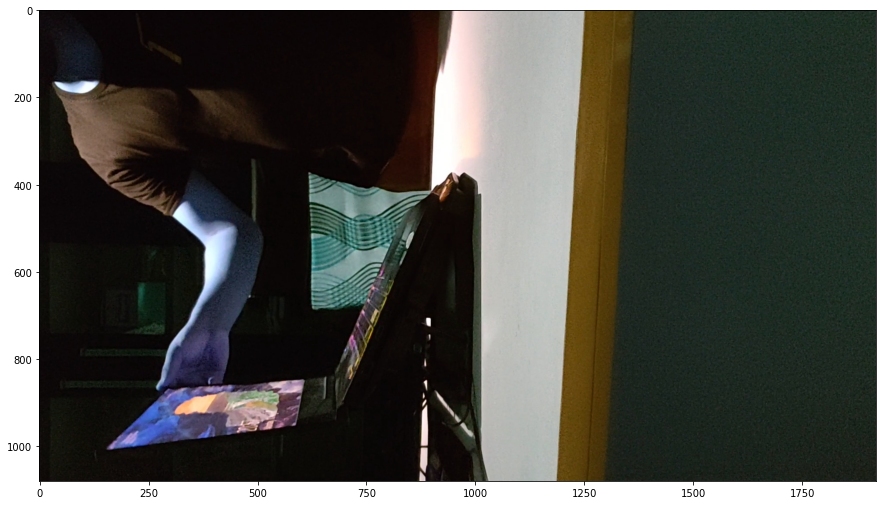

In [15]:
plt.figure(figsize=(15,10))
plt.imshow(sv[3,:,:,:])
plt.show()

In [16]:
sv[4,:,:,:].shape

(1080, 1920, 3)

KeyError: ignored

In [31]:
import glob
filen = glob.glob('./*.mp4')


In [33]:
videos = {}
for file in filen:
  cap = cv2.VideoCapture(file)
  framerate = cap.get(5)
  total_frames = cap.get(7)
  desired_fps = 10
  frame_skip = int(np.ceil(framerate/desired_fps))
  frames = []
  while(cap.isOpened()):
    fId = cap.get(1)
    ret,frame = cap.read()
    if(ret!= True):
      break
    if(fId % frame_skip == 0):
      frames.append(frame)
  cap.release()
  sv = np.array(frames)
  videos[file] = sv



In [34]:

sanity_check = True
dim_set = set()
for video in videos.values():
  dim_set.add(video[0].shape)
if(len(dim_set)>1):
  sanity_check = False
print(sanity_check)

True


In [39]:
videos['./VID_6.mp4'][4,:,:,:].shape

(1080, 1920, 3)

In [43]:
videos['./VID_14.mp4'][10,:,:,:]

array([[[ 20,  12,  16],
        [ 20,  12,  16],
        [ 20,  12,  16],
        ...,
        [ 26,  18,  16],
        [ 26,  18,  16],
        [ 26,  18,  16]],

       [[ 20,  12,  16],
        [ 20,  12,  16],
        [ 20,  12,  16],
        ...,
        [ 26,  18,  16],
        [ 26,  18,  16],
        [ 26,  18,  16]],

       [[ 20,  12,  16],
        [ 20,  12,  16],
        [ 20,  12,  16],
        ...,
        [ 26,  18,  16],
        [ 26,  18,  16],
        [ 26,  18,  16]],

       ...,

       [[ 20,   9,  13],
        [ 20,   9,  13],
        [ 20,   9,  13],
        ...,
        [ 75, 103,  83],
        [ 76, 104,  84],
        [ 77, 105,  85]],

       [[ 22,  11,  15],
        [ 22,  11,  15],
        [ 22,  11,  15],
        ...,
        [ 77, 105,  85],
        [ 77, 105,  85],
        [ 76, 104,  84]],

       [[ 22,  11,  15],
        [ 22,  11,  15],
        [ 23,  12,  16],
        ...,
        [ 77, 105,  85],
        [ 75, 103,  83],
        [ 74, 102,  82]]

In [42]:
videos['./VID_14.mp4'][13,:,:,:]

array([[[19, 11, 15],
        [19, 11, 15],
        [19, 11, 15],
        ...,
        [30, 21, 19],
        [29, 20, 18],
        [28, 19, 17]],

       [[18, 10, 14],
        [18, 10, 14],
        [18, 10, 14],
        ...,
        [28, 19, 17],
        [27, 18, 16],
        [30, 21, 19]],

       [[19, 11, 15],
        [19, 11, 15],
        [19, 11, 15],
        ...,
        [29, 20, 18],
        [29, 20, 18],
        [31, 22, 20]],

       ...,

       [[24, 10, 15],
        [23,  9, 14],
        [23,  9, 14],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [75, 96, 80]],

       [[25, 11, 16],
        [25, 11, 16],
        [26, 12, 17],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [74, 95, 79]],

       [[26, 12, 17],
        [27, 13, 18],
        [27, 13, 18],
        ...,
        [75, 96, 80],
        [75, 96, 80],
        [74, 95, 79]]], dtype=uint8)